In [1]:
from dichasus_cf0x import training_set, test_set
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

2024-02-10 16:52:02.854436: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-10 16:52:03.544471: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-02-10 16:52:04.474770: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-10 16:52:04.497030: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

In [2]:
training_set_delayspreads = []
test_set_delayspreads = []

for csi, pos, time, ds in training_set.batch(1000):
    training_set_delayspreads.append(ds.numpy())

for csi, pos, time, ds in test_set.batch(1000):
    test_set_delayspreads.append(ds.numpy())

training_set_delayspreads = np.concatenate(training_set_delayspreads)
test_set_delayspreads = np.concatenate(test_set_delayspreads)

In [3]:
np.save("results/training_set_delayspreads.npy", training_set_delayspreads)
np.save("results/test_set_delayspreads.npy", test_set_delayspreads)

In [4]:
training_set_positions = np.load("results/training_set_positions.npy")
test_set_positions = np.load("results/test_set_positions.npy")

In [9]:
def plot_delayspreads(positions, delayspreads):
    delayspreads_by_array = np.mean(delayspreads, axis = (2, 3))
    for array in range(np.shape(delayspreads_by_array)[1]):
        plt.figure(figsize=(7, 7))
        plt.title("Measured Delay Spread - Antenna " + str(array))
        plt.hexbin(positions[:,0], positions[:,1], C = delayspreads_by_array[:, array], gridsize = 40, vmin = 0, vmax = 1.5e-7)
        plt.xlabel("Transmitter Position x [m]")
        plt.ylabel("Transmitter Position y [m]")
        plt.xlim((-12.5, 2.5))
        plt.ylim((-15.5, -0.5))
        plt.colorbar(label = "Delay Spread [s]")
        plt.show()

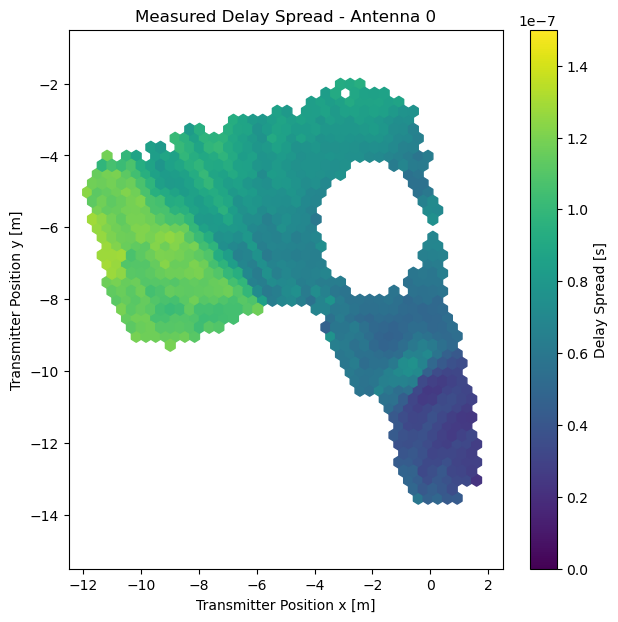

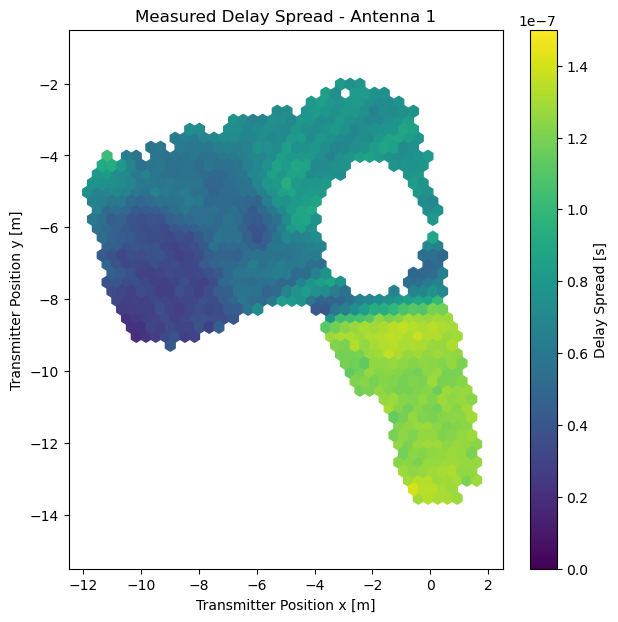

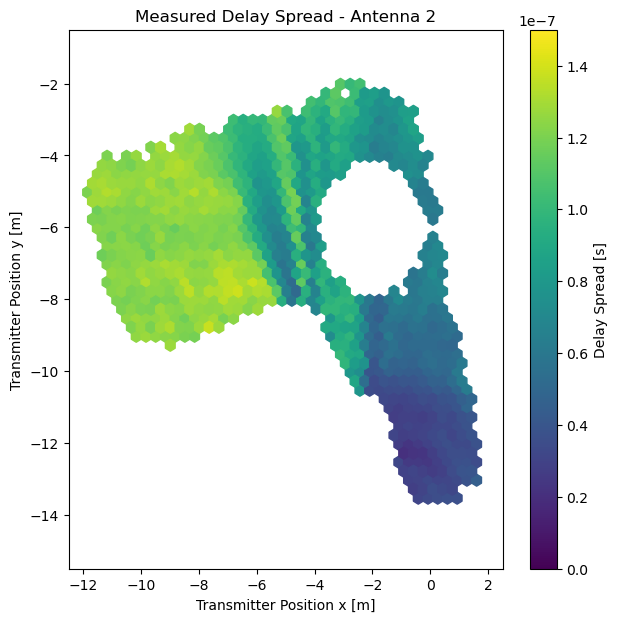

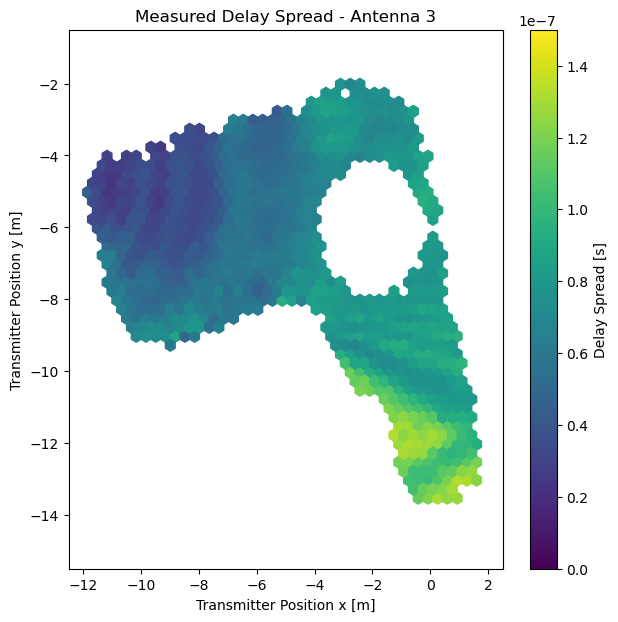

In [10]:
plot_delayspreads(training_set_positions, training_set_delayspreads)

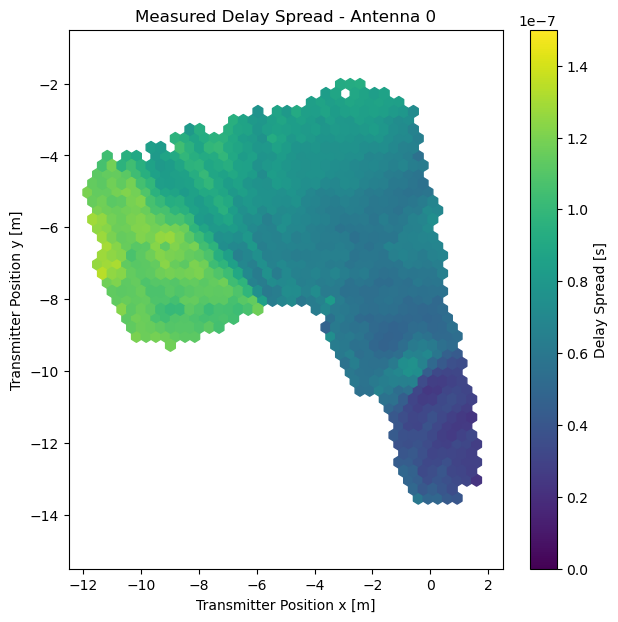

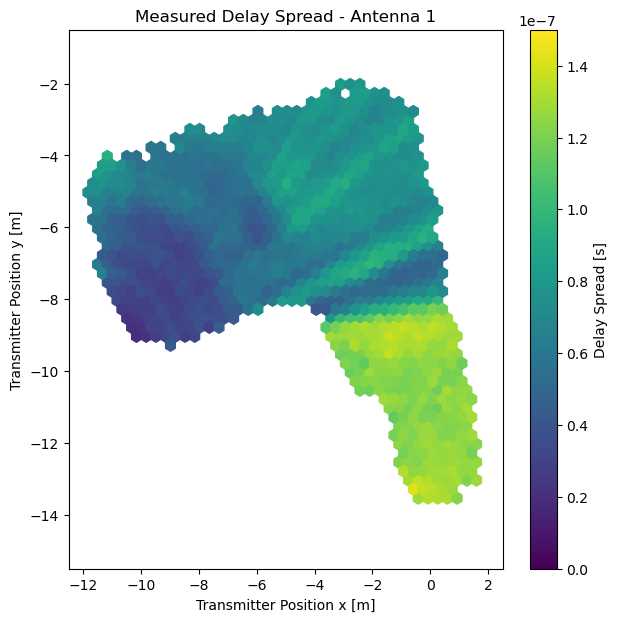

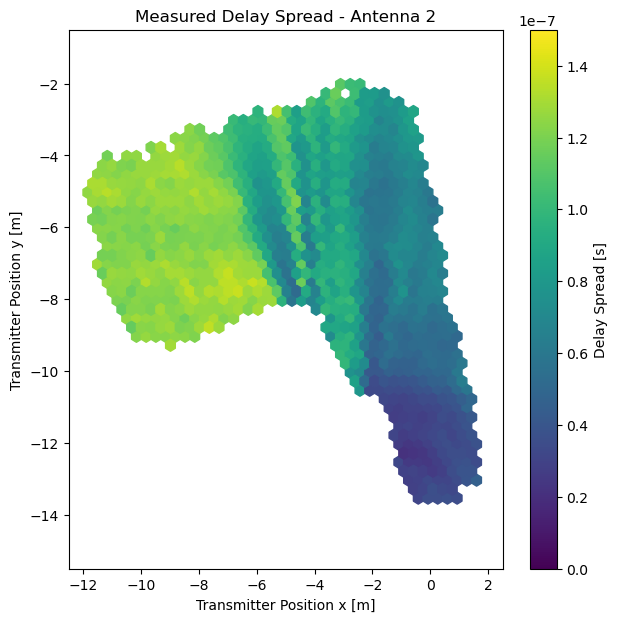

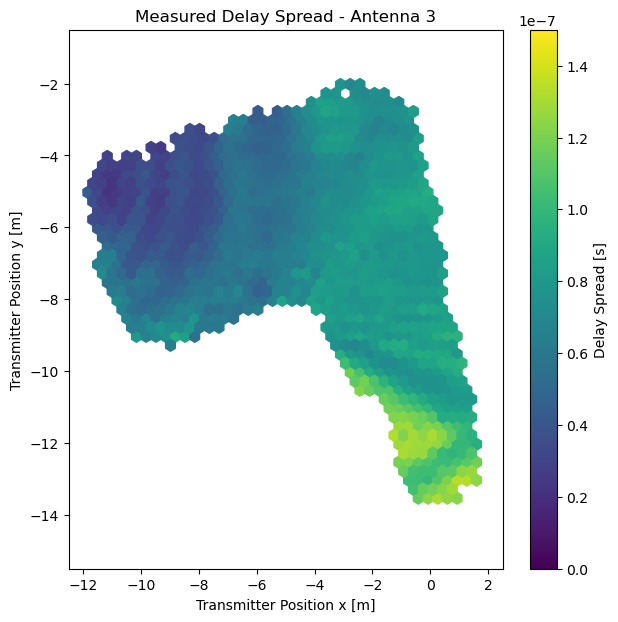

In [11]:
plot_delayspreads(test_set_positions, test_set_delayspreads)